<a href="https://colab.research.google.com/github/elvis-mutanyi/NYC_taxi_data_analysis/blob/master/Project_1_NYC_Taxi_Trip_Duration_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction


**Project Definition** 

New York City Trips data obtained from: [https://www.kaggle.com/c/nyc-taxi-trip-duration] has been used in this project to predict the total ride duration of taxi trips in New York City.

Different techniques of Data Analysis were used to get insights about the data and determine how different variables are dependent on the target variable Trip Duration.

**Importing required libraries**

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime
sns.set()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Reading the data file**

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/train.csv')
df.shape

(1458644, 11)

# Data Manipulation

**Checking head and tail of data** 

In [ ]:
df.head() # checking the first 5 rows of the train data

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [ ]:
df.tail() #checking the last 5 rows of the train data

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373
1458643,id1209952,1,2016-04-05 14:44:25,2016-04-05 14:47:43,1,-73.979538,40.781750,-73.972809,40.790585,N,198


**Checking the data types of the various fields**

In [ ]:
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

**Converting the 'pickup_datetime' and 'dropoff_datetime' into proper datetime format**

In [ ]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime']) #using to_datetime() method
df.dropoff_datetime=pd.to_datetime(df.dropoff_datetime)
df.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
dtype: object

**Checking for missing values**

In [ ]:
df.isnull().any()  #no missing values found

id                    False
vendor_id             False
pickup_datetime       False
dropoff_datetime      False
passenger_count       False
pickup_longitude      False
pickup_latitude       False
dropoff_longitude     False
dropoff_latitude      False
store_and_fwd_flag    False
trip_duration         False
dtype: bool

**Checking for outliers and highlighting them using box plot**

Text(0.5, 1.0, 'boxplot of duration distribution')

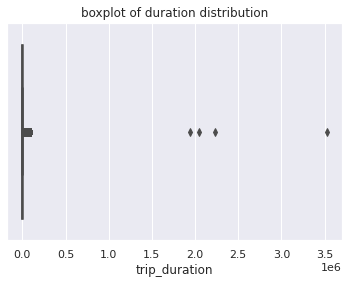

In [ ]:
sns.boxplot(df['trip_duration'], orient='horizontal')
plt.title('boxplot of duration distribution')

*The outliers comprise of 3 values near 2000000 and 1 value near 3500000. These 4 points are outliers in our data*

*The rest of the data ranges fall between 0 and 500000.*




**Removing the outliers**

In [ ]:
df['trip_duration'].nlargest(8)

978383     3526282
924150     2227612
680594     2049578
355003     1939736
1234291      86392
295382       86391
73816        86390
59891        86387
Name: trip_duration, dtype: int64

*the duration of the top 4 rows is comparitively much higher than the 5th and subsequent rows.Therefore we can remove those rows from our dataframe*


In [ ]:
df=df[~df.trip_duration.isin(df['trip_duration'].nlargest(4).tolist())]

In [ ]:
df['trip_duration'].nlargest(5)

1234291    86392
295382     86391
73816      86390
59891      86387
1360439    86385
Name: trip_duration, dtype: int64

Text(0.5, 1.0, 'Distribution of the pickup ditribution after removal of outliers')

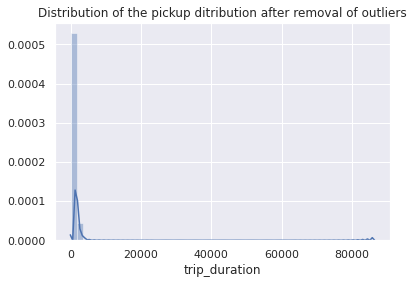

In [ ]:
#Distribution after removing outliers
sns.distplot(df['trip_duration'])
plt.title('Distribution of the pickup ditribution after removal of outliers')

*We still have an extreme right skewness. Thus we will divide the trip_duration column into intervals of :*
*- < 5 hours*
*- 5–10 hours*
*- 10–15 hours*
*- 15–20 hours*
*- > 20 hours*



In [ ]:
bins=np.array([0,1800,3600,5400,7200,90000])
df['duration_time']=pd.cut(df.trip_duration,bins,labels=["< 5", "5-10", "10-15","15-20",">20"])

In [ ]:
df.duration_time.value_counts()

< 5      1345526
5-10      100801
10-15       9220
>20         2249
15-20        844
Name: duration_time, dtype: int64

# EDA with Python

**Total number of trips**

In [ ]:
print("Total Trips: ",df.id.unique().shape[0])

Total Trips:  1458640


**Total number of unique vendors**

In [ ]:
print("Total vendors: ",df.vendor_id.unique().shape[0])

Total vendors:  2


**Getting Distance from the pickup and drop off location using haversine distance**

*Haversine distance is used to calculate distance between two points in a sphere*

In [ ]:
#!pip install haversine
from haversine import haversine

In [ ]:
listA = []
for index,row in df.iterrows():
    pickup_lat = row['pickup_latitude']
    pickup_long = row['pickup_longitude']
    drop_lat = row['dropoff_latitude']
    drop_long = row['dropoff_longitude']
    res = haversine((pickup_lat,pickup_long),(drop_lat,drop_long))
    listA.append(res)



In [ ]:
df['trip_distance'] = listA

In [ ]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,duration_time,trip_distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,< 5,1.498523
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,< 5,1.805510
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,5-10,6.385107
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,< 5,1.485500
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,< 5,1.188590


**Descriptive stats for trip duration, distance and passenger count**

In [ ]:
df[['trip_duration','trip_distance','passenger_count']].describe()

,trip_duration,trip_distance,passenger_count
count,1.458640e+06,1.458640e+06,1.458640e+06
mean,9.528153e+02,3.440845e+00,1.664531e+00
std,3.171322e+03,4.296505e+00,1.314244e+00
min,1.000000e+00,0.000000e+00,0.000000e+00
25%,3.970000e+02,1.231836e+00,1.000000e+00
50%,6.620000e+02,2.093714e+00,1.000000e+00
75%,1.075000e+03,3.875328e+00,2.000000e+00
max,8.639200e+04,1.240910e+03,9.000000e+00


**Distribution of Pickup and Drop Off day of the week**

In [ ]:
#converting the dates into days of the week
df['pickup_day']=df['pickup_datetime'].dt.day_name()
df['dropoff_day']=df['dropoff_datetime'].dt.day_name()

**Pickup Distribution by day of the week**

In [ ]:
df['pickup_day'].value_counts()

Friday       223533
Saturday     220866
Thursday     218574
Wednesday    210136
Tuesday      202747
Sunday       195366
Monday       187418
Name: pickup_day, dtype: int64

**Dropoff Distribution by day of the week**

In [ ]:
df['dropoff_day'].value_counts()

Friday       223030
Saturday     220902
Thursday     217746
Wednesday    209789
Tuesday      202517
Sunday       197223
Monday       187433
Name: dropoff_day, dtype: int64

**Plotting the pickup and dropoff by day of the week**

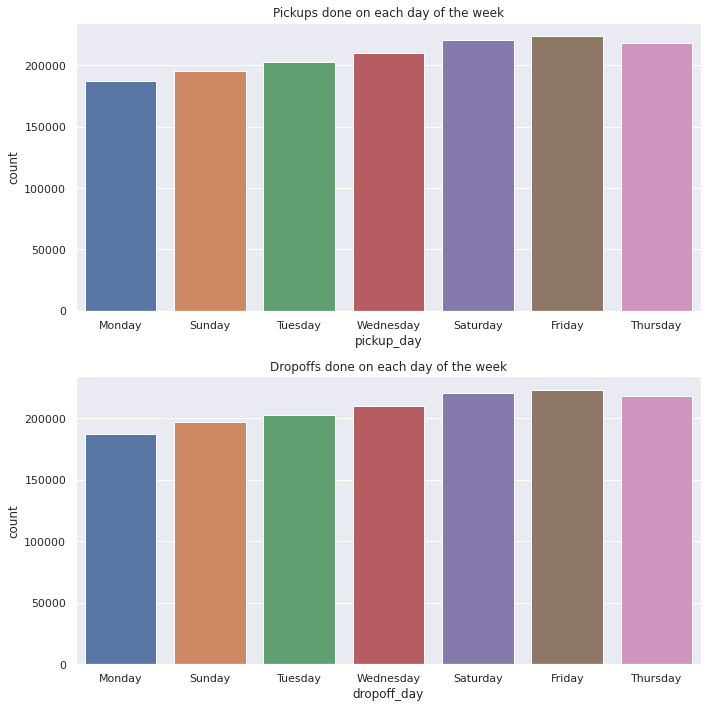

In [ ]:
figure,ax=plt.subplots(nrows=2,ncols=1,figsize=(10,10))
sns.countplot(x='pickup_day',data=df,ax=ax[0])
ax[0].set_title('Pickups done on each day of the week')
sns.countplot(x='dropoff_day',data=df,ax=ax[1])
ax[1].set_title('Dropoffs done on each day of the week')
plt.tight_layout()

*We see most trips were taken on Friday and Monday being the least*



**Pickup and Drop Off Distribution by time of the day**


For our analysis we will divide the times into 4 time zones:

- Early morning (4 hrs to 8 hrs)
- Morning (8 hrs to 12 hrs) , 
- Afternoon (12 hrs to 17 hrs) , 
- Evening (17 hrs to  20 hrs),
- Night (20 hrs to 0 hrs)
- Mid night (0 hrs to 4hrs)



In [ ]:
def get_time_bin(x):
    if x>=datetime.time(4, 0, 1) and x <=datetime.time(8, 0, 0):
        return 'early morning'
    if x>=datetime.time(8, 0, 1) and x <=datetime.time(12, 0, 0):
        return 'morning'
    elif x>=datetime.time(12, 0, 1) and x <=datetime.time(17, 0, 0):
        return 'afternoon'
    elif x>=datetime.time(17, 0, 1) and x <=datetime.time(20, 0, 0):
        return 'evening'
    elif x>=datetime.time(20, 0, 1) or x <=datetime.time(0, 0, 0):
        return 'night'
    elif x>=datetime.time(0, 0, 1) or x <=datetime.time(4, 0, 0):
        return 'mid night'
    
df['pickup_timezone']=df['pickup_datetime'].apply(lambda x :get_time_bin(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )
df['dropoff_timezone']=df['dropoff_datetime'].apply(lambda x :get_time_bin(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )

**Plotting the Distributions:**

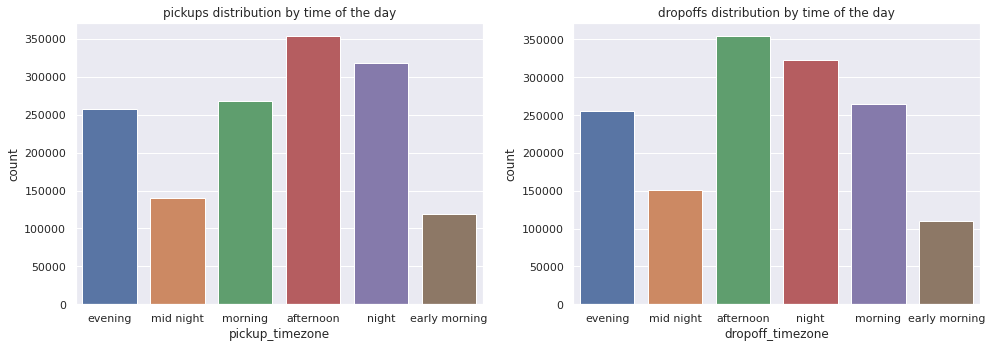

In [ ]:
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(14,5))
sns.countplot(x='pickup_timezone',data=df,ax=ax[0])
ax[0].set_title('pickups distribution by time of the day')
sns.countplot(x='dropoff_timezone',data=df,ax=ax[1])
ax[1].set_title('dropoffs distribution by time of the day')
plt.tight_layout()



    most pickups and drops occur in the afternoon (12 hrs to 17 hrs).
    least drops and pickups occur during early morning (4 hrs to 8 hrs)



**Pickup and Dropoff Distribution by Hour of the day**

Text(0.5, 1.0, 'Distribution of dropoff hours')

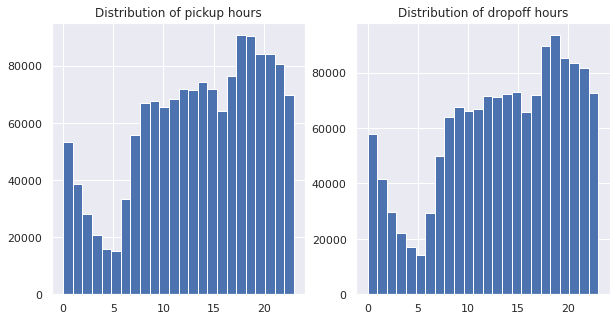

In [ ]:
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
df['pickup_hour']=df['pickup_datetime'].dt.hour
df.pickup_hour.hist(bins=24,ax=ax[0])
ax[0].set_title('Distribution of pickup hours')
df['dropoff_hour']=df['dropoff_datetime'].dt.hour
df.dropoff_hour.hist(bins=24,ax=ax[1])
ax[1].set_title('Distribution of dropoff hours')



**Distribution of the trip duration**

Text(0.5, 1.0, 'Trip Duration distribution')

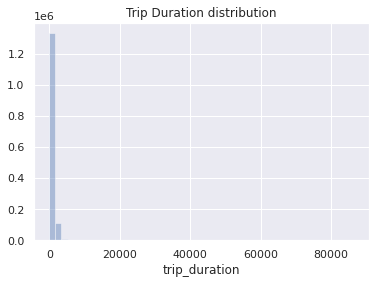

In [ ]:
sns.distplot(df['trip_duration'],kde=False)
plt.title('Trip Duration distribution')




**Geo plot using lat and long to understand the distribution of trips**

In [ ]:
#!pip install geopandas

from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(df['pickup_longitude'], df['pickup_latitude'])]
gdf = GeoDataFrame(df, geometry=geometry) 

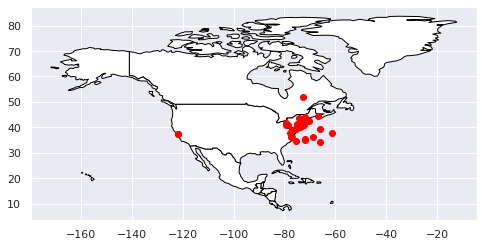

In [ ]:

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# We restrict to North America.
ax = world[world.continent == 'North America'].plot(
    color='white', edgecolor='black',figsize=(8, 8))

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red')

plt.show()



**Line plot to understand daily number of trips, distance travelled ,trip duration and total passengers**

*No. of Trips*

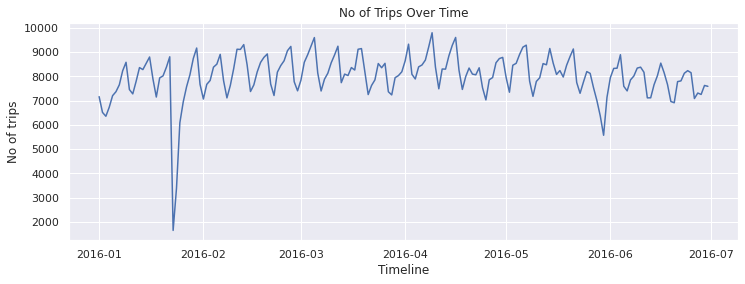

In [ ]:
# No of Trips time-series by day
data = df.groupby(df.pickup_datetime.dt.date).aggregate({'id':['nunique']})
plt.figure(figsize=(12,4))
plt.title('No of Trips Over Time')
plt.ylabel('No of trips') ; plt.xlabel('Timeline')
plt.plot(data)
pass

*Trip Duration*

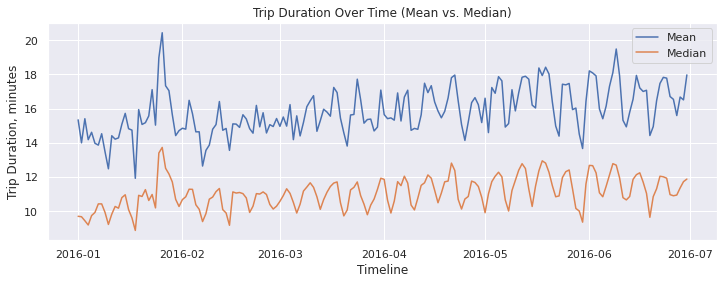

In [ ]:
# trip duration time-series by day, mean vs. median
data = df.groupby(df.pickup_datetime.dt.date).aggregate({'trip_duration':['mean', 'median']})/60
plt.figure(figsize=(12,4))
plt.title('Trip Duration Over Time (Mean vs. Median)')
plt.ylabel('Trip Duration, minutes') ; plt.xlabel('Timeline')
plt.plot(data)
plt.legend(['Mean', 'Median'])
pass

*Trip Duration By Vendors comparison*

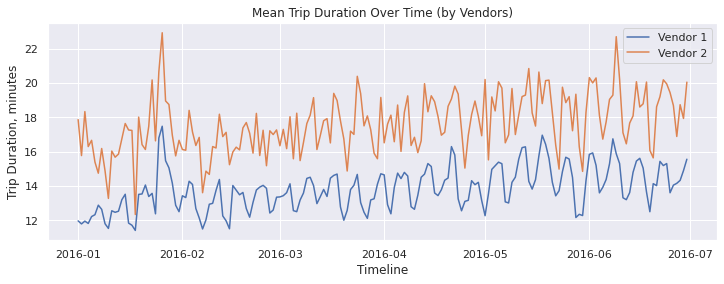

In [ ]:
data = pd.crosstab(index=df.pickup_datetime.dt.date, 
                   columns=df.vendor_id, 
                   values=df.trip_duration/60, 
                   aggfunc='mean')
plt.figure(figsize=(12,4))
plt.title('Mean Trip Duration Over Time (by Vendors)')
plt.ylabel('Trip Duration, minutes') ; plt.xlabel('Timeline')
plt.plot(data)
plt.legend(['Vendor 1', 'Vendor 2'])
pass



*No. of passangers*

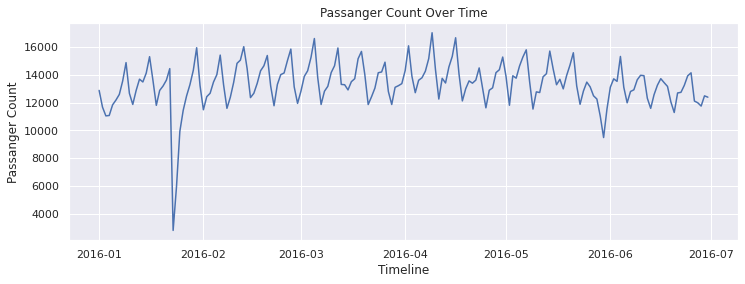

In [ ]:
# Total Passangers time-series by day
data = df.groupby(df.pickup_datetime.dt.date).aggregate({'passenger_count':['sum']})
plt.figure(figsize=(12,4))
plt.title('Passanger Count Over Time')
plt.ylabel('Passanger Count') ; plt.xlabel('Timeline')
plt.plot(data)
pass

**Scatter plot to understand distance vs duration relation**

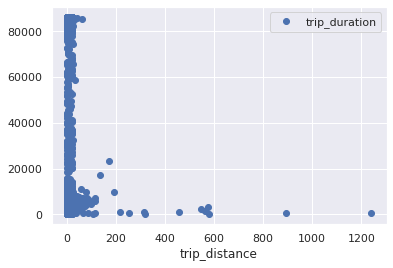

In [ ]:
df.plot(x='trip_distance', y='trip_duration', style='o')

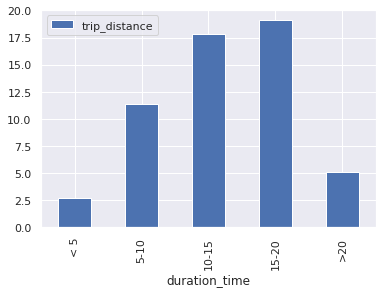

In [ ]:
df.groupby(['duration_time'])['trip_distance'].mean().reset_index().plot(x = 'duration_time',y = 'trip_distance',kind = 'bar')